In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/bhargav1000/textclassifier/master/original_dataset/ISEAR/DATA.csv',
              header=None, names=['Emotions', 'Text'])
df.head()

,Emotions,Text
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, shuffle=True, test_size=0.1)
df_train, df_val = train_test_split(df_train, shuffle=True, test_size=0.1)

df_train.to_csv('train.csv')
df_test.to_csv('test.csv')
df_val.to_csv('dev.csv')

In [ ]:
df.describe()

,Emotions,Text
count,7652,7652
unique,7,7489
top,anger,[ No response.]
freq,1094,77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  7652 non-null   object
 1   Text      7652 non-null   object
dtypes: object(2)
memory usage: 119.7+ KB


joy        903
guilt      894
sadness    892
shame      888
fear       882
disgust    874
anger      864
Name: Emotions, dtype: int64

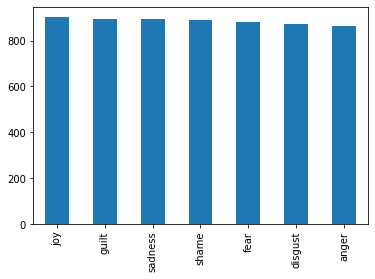

In [ ]:
df_train['Emotions'].value_counts().plot(kind='bar')
df_train['Emotions'].value_counts()

In [ ]:
import numpy as np

x=df.iloc[np.random.randint(0, df.shape[0])]
print(x['Text'], x['Emotions'])

Political and military trnsgressions around the world, generally 
speaking. This cannot be described through this questionaire. disgust



(The functionality resembles the recommendations made by Grammarly for grammar corrections but here we are doing it for emotion correction)

 

* Investigate and identify the mechanism to do the following using ML and DL (language embeddings can be used for transfer learning, like FastBERT, GPT2 etc.):
* Say we have a chunk of text of 1000 words and we want to perform the emotion detection task over it
* How can we do that
On paragraph level
On sentence level
* Once the various emotions are identified,
* How can we trace the cause of a particular emotion
* What paragraphs/sentences are responsible for a particular emotion in the whole text
* What keywords are responsible for a particular emotion
* Once the responsible sentences and keywords are identified,
* How we can recommend the replacement keywords or phrases to change the emotion (both for increasing and decreasing) – the recommendation needs to be intelligent and not just suggest adverbs or adjectives.
 

Note: The predictions need to be contextually relevant.

In [ ]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.4 MB 34.1 MB/s 
     |████████████████████████████████| 362 kB 58.6 MB/s 
     |████████████████████████████████| 596 kB 60.6 MB/s 
     |████████████████████████████████| 6.6 MB 45.0 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 212 kB 72.0 MB/s 
     |████████████████████████████████| 1.1 MB 18.5 MB/s 
     |████████████████████████████████| 140 kB 71.3 MB/s 
     |████████████████████████████████| 127 kB 73.0 MB/s 
     |████████████████████████████████| 144 kB 68.1 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 68.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name='j-hartmann/emotion-english-distilroberta-base'

tokenizer=AutoTokenizer.from_pretrained(model_name)
model=AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset, load_metric

data_files={'train':'/content/train.csv',
            "val": '/content/dev.csv',
            "test": '/content/test.csv'}
ds = load_dataset('csv', data_files=data_files)
ds

Using custom data configuration default-578124432d011b74
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-578124432d011b74/0.0.0/51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Emotions', 'Text'],
        num_rows: 6197
    })
    val: Dataset({
        features: ['Unnamed: 0', 'Emotions', 'Text'],
        num_rows: 689
    })
    test: Dataset({
        features: ['Unnamed: 0', 'Emotions', 'Text'],
        num_rows: 766
    })
})

In [ ]:
ds['train'][0]['Text']

'When some friends and I get acquainted a guy during vacations I \nthought he was disgusted and "a friend" of mine for whom I feel a \nlittle disgust wanted to stay with him.'

In [ ]:
import torch
from transformers import DataCollatorWithPadding
from datasets import ClassLabel

classes=['anger', 'shame', 'joy', 'fear', 'sadness', 'guilt', 'disgust']

labels=ClassLabel(num_classes=7, names=classes)

def tokenize(example):
    example['labels']=labels.str2int(example['Emotions'])
    return tokenizer(example['Text'], truncation=True)

tokenized_ds=ds.map(tokenize, batched=True)
collator=DataCollatorWithPadding(tokenizer=tokenizer)

Parameter 'function'=<function tokenize at 0x7f5c39fc7680> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_ds['train'][0]['input_ids'].astype('list')

AttributeError: ignored

In [ ]:
tokenized_ds=tokenized_ds.remove_columns(['Unnamed: 0', 'Text', 'Emotions'])
tokenized_ds.set_format('torch')
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6197
    })
    val: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 689
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 766
    })
})

In [ ]:
from torch.utils.data import DataLoader

train_loader=DataLoader(tokenized_ds['train'], shuffle=True, batch_size=16, collate_fn=collator)
test_loader=DataLoader(tokenized_ds['test'], collate_fn=collator)
val_loader=DataLoader(tokenized_ds['val'], collate_fn=collator)

In [ ]:
from transformers import get_scheduler

device = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_EPOCHS=5
NUM_TRAINING_STEP=NUM_EPOCHS* len(train_loader)

optim=torch.optim.AdamW(model.parameters(), lr=5e-5)
lr_scheduler=get_scheduler(name='linear', optimizer=optim, num_training_steps=NUM_TRAINING_STEP, num_warmup_steps=0)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer=SummaryWriter()

In [ ]:
for batch in train_loader:
    break
{k:v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([16, 52]),
 'input_ids': torch.Size([16, 52]),
 'labels': torch.Size([16])}

In [ ]:
from tqdm import tqdm
from datasets import load_metric

precision=load_metric('precision')
recall=load_metric('recall')
f1=load_metric('f1')
model.to(device)

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch in tqdm(train_loader):
        batch={k:v.to(device) for k, v in batch.items()}
        output=model(**batch)
        loss=output.loss
        loss.backward()

        optim.step()
        lr_scheduler.step()
        optim.zero_grad()
        writer.add_scalar("Loss/train", loss, epoch)
    
    model.eval()
    for batch in tqdm(val_loader):
        batch={k:v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            output=model(**batch)

        predictions=output.logits
        referenced=batch['labels']
        _, predictions=torch.max(predictions, axis=-1)

        precision.add_batch(predictions=predictions, references=referenced)
        recall.add_batch(predictions=predictions, references=referenced)
        f1.add_batch(predictions=predictions, references=referenced)
    preci=precision.compute(average='macro')
    rec=recall.compute(average='macro')
    f1_score=f1.compute(average='macro')
    print(
        f"epoch {epoch}:",
        {
            'Precision':preci,
            'Recall':rec,
            'F1-Score':f1_score
        },
    )

100%|██████████| 689/689 [00:06<00:00, 104.71it/s]


epoch 0: {'Precision': {'precision': 0.7249376483386788}, 'Recall': {'recall': 0.7302249073810553}, 'F1-Score': {'f1': 0.7268176816549944}}


100%|██████████| 689/689 [00:05<00:00, 122.20it/s]


epoch 1: {'Precision': {'precision': 0.7249376483386788}, 'Recall': {'recall': 0.7302249073810553}, 'F1-Score': {'f1': 0.7268176816549944}}


100%|██████████| 689/689 [00:05<00:00, 119.89it/s]


epoch 2: {'Precision': {'precision': 0.7249376483386788}, 'Recall': {'recall': 0.7302249073810553}, 'F1-Score': {'f1': 0.7268176816549944}}


100%|██████████| 689/689 [00:05<00:00, 122.98it/s]


epoch 3: {'Precision': {'precision': 0.7249376483386788}, 'Recall': {'recall': 0.7302249073810553}, 'F1-Score': {'f1': 0.7268176816549944}}


100%|██████████| 689/689 [00:05<00:00, 116.67it/s]


epoch 4: {'Precision': {'precision': 0.7249376483386788}, 'Recall': {'recall': 0.7302249073810553}, 'F1-Score': {'f1': 0.7268176816549944}}


In [ ]:
writer.flush()
!pip install -q tensorboard
!tensorboard --logdir=runs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
from tqdm import tqdm
precision=load_metric('precision')
recall=load_metric('recall')
f1=load_metric('f1')

def evaluate():
    predicts=[]
    model.eval()
    for batch in tqdm(test_loader):
        batch={k:v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            output=model(**batch)

        predictions=output.logits
        referenced=batch['labels']
        _, predictions=torch.max(predictions, axis=-1)
        predicts.append(labels.int2str(predictions))

        precision.add_batch(predictions=predictions, references=referenced)
        recall.add_batch(predictions=predictions, references=referenced)
        f1.add_batch(predictions=predictions, references=referenced)
    preci=precision.compute(average='macro')
    rec=recall.compute(average='macro')
    f1_score=f1.compute(average='macro')
    print(preci, rec, f1_score)
    return predicts

predictions=evaluate()

100%|██████████| 766/766 [00:06<00:00, 115.73it/s]

{'precision': 0.9140753526444316} {'recall': 0.9138843997842093} {'f1': 0.9137515613065151}


In [ ]:
torch.save(model, 'model.pt')

In [ ]:
model=torch.load('/content/drive/MyDrive/Colab Notebooks/model.pt', map_location=torch.device('cuda'))

In [ ]:
def predict(sentence):
    tokens=tokenizer(sentence, truncation=True, max_length=128, padding='max_length', return_tensors='pt')
    tokens={k:v.to(device) for k, v in tokens.items()}
    output=model(**tokens)
    logits=output.logits
    prediction=torch.argmax(logits, axis=-1)
    return prediction.item()

labels.int2str(predict('Hello I am feeling good.'))

'joy'

In [ ]:
import numpy as np

preds=np.array(predictions).reshape(-1)
preds[:3]

ans_df=pd.DataFrame({
    'Emotions':df_test['Emotions'],
    'Text':df_test['Text'],
    'Predicted Emotions':preds
})

In [ ]:
ans_df[ans_df['Predicted Emotions']!=ans_df['Emotions']]['Emotions'].value_counts()

shame      16
guilt      14
sadness    11
anger       8
fear        8
disgust     6
joy         3
Name: Emotions, dtype: int64

<Figure size 1080x1080 with 0 Axes>

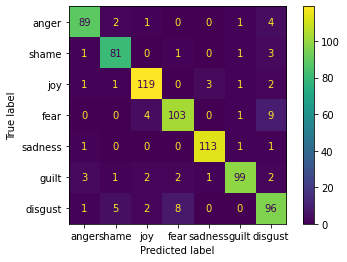

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
c_f=confusion_matrix(df_test['Emotions'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=c_f,
                             display_labels=classes)
disp.plot()
plt.show()

In [ ]:
!pip uninstall -q gradio
!pip install -q gradio


Proceed (y/n)? y
